<a href="https://colab.research.google.com/github/Ayush-mishra-0-0/Time-Series_Analysis/blob/main/Stock_predicting_using_ARMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pmdarima -q
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stock_data = pd.read_csv('acwx.us.txt',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
stock_data

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2008-03-31,42.352,42.3520,42.352,42.352,355,0
2008-04-01,54.742,54.7420,42.873,43.254,1306,0
2008-04-02,43.667,43.8160,43.667,43.675,2368,0
2008-04-03,43.885,44.0950,43.885,44.061,2078,0
2008-04-04,48.468,48.4680,44.012,44.171,1994,0
...,...,...,...,...,...,...
2017-11-06,49.380,49.6350,49.360,49.635,187693,0
2017-11-07,49.400,49.4400,49.310,49.440,1306495,0
2017-11-08,49.550,49.6699,49.490,49.610,418877,0


from matplotlib import pyplot as plt
stock_data['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
stock_data['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
stock_data['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
stock_data['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
stock_data.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
stock_data.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
stock_data.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
stock_data.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['OpenInt']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = stock_data.sort_values('OpenInt', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('OpenInt')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['OpenInt']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = stock_data.sort_values('OpenInt', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('OpenInt')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['OpenInt']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = stock_data.sort_values('OpenInt', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('OpenInt')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['OpenInt']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = stock_data.sort_values('OpenInt', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('OpenInt')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
stock_data['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
stock_data['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
stock_data['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
stock_data['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

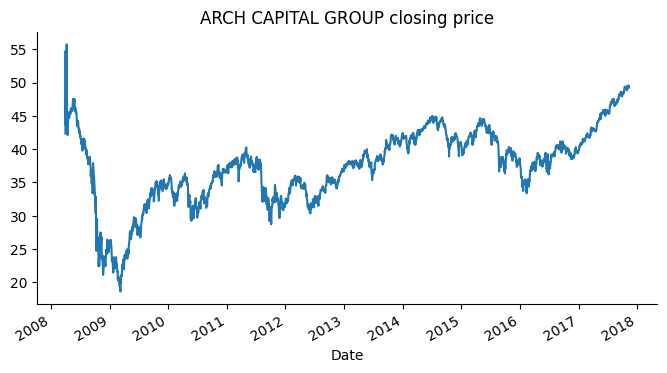

In [6]:
from matplotlib import pyplot as plt
stock_data['Open'].plot(kind='line', figsize=(8, 4), title='ARCH CAPITAL GROUP closing price')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: ylabel='Density'>

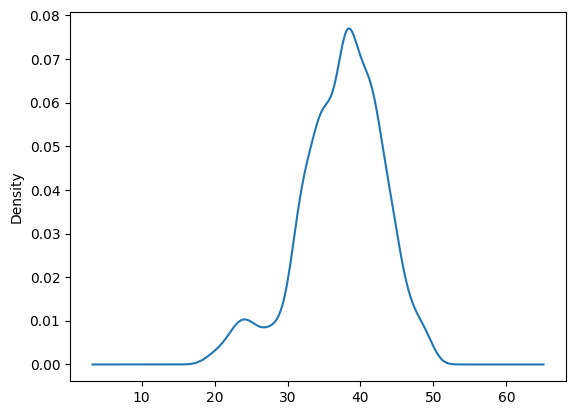

In [7]:
df= stock_data['Close']
df.plot(kind='kde')

# APPLYING ADF (Augmented Dickey-Fuller) Test
Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

If the null hypothesis is not rejected, the series is said to be non-stationary. The series can be linear or difference stationary as a result of this.

The series becomes stationary if both the mean and standard deviation are flat lines (constant mean and constant variance).


In [8]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    print(adft)
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)


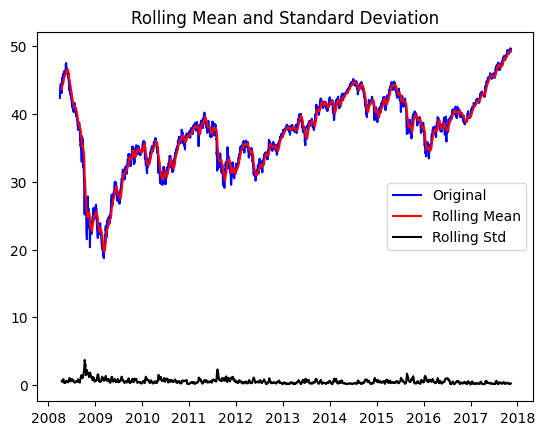

Results of dickey fuller test
(-1.7576595421472196, 0.40167577123998627, 20, 2403, {'1%': -3.4330742193886445, '5%': -2.8627435243022283, '10%': -2.567410686207021}, 3318.2565401527095)
Test Statistics                  -1.757660
p-value                           0.401676
No. of lags used                 20.000000
Number of observations used    2403.000000
critical value (1%)              -3.433074
critical value (5%)              -2.862744
critical value (10%)             -2.567411
dtype: float64


In [9]:
test_stationarity(df)

<Figure size 640x480 with 0 Axes>

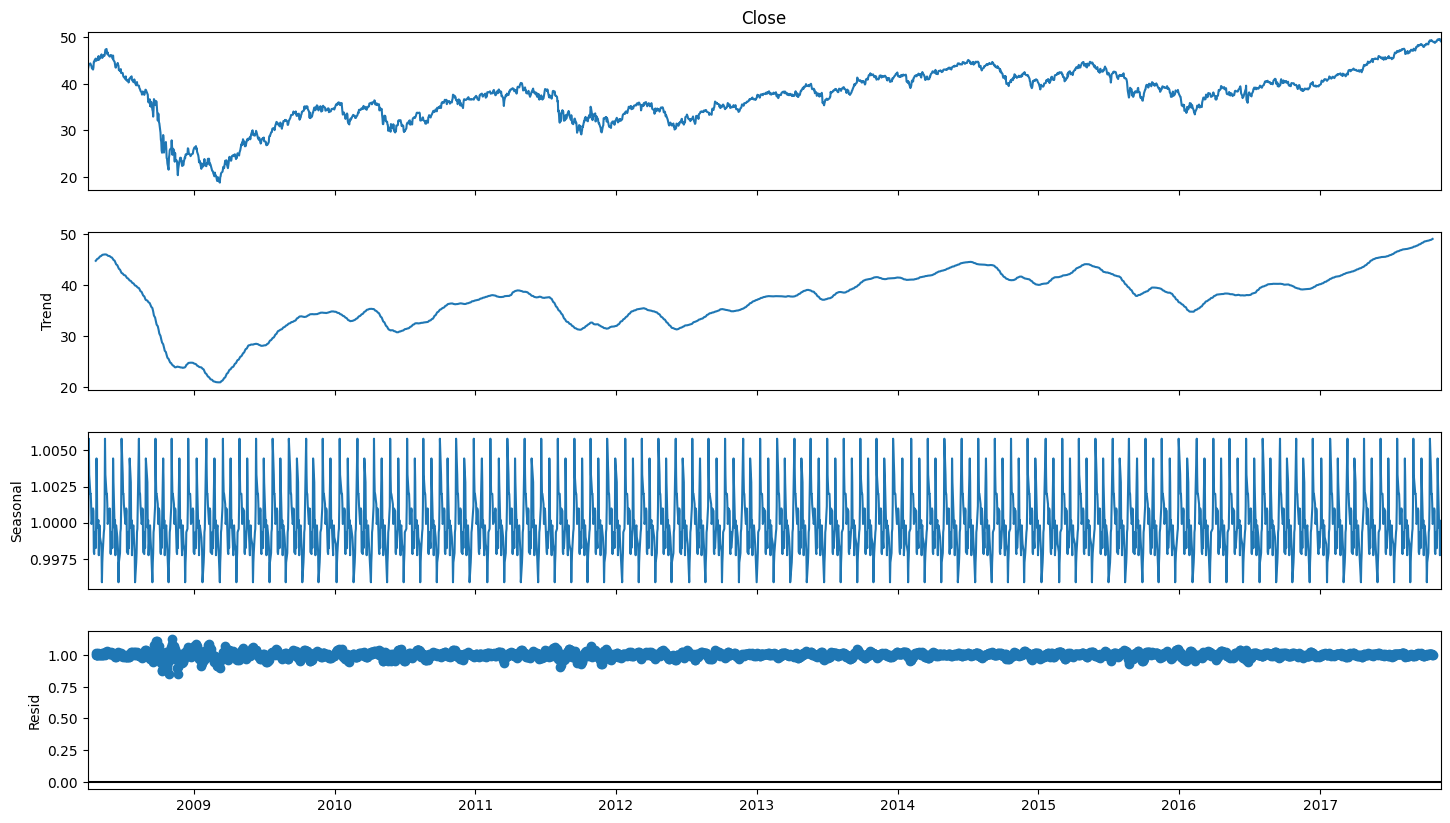

In [10]:
## in above graph we can see std is constant but mean is not
result = seasonal_decompose(df, model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)

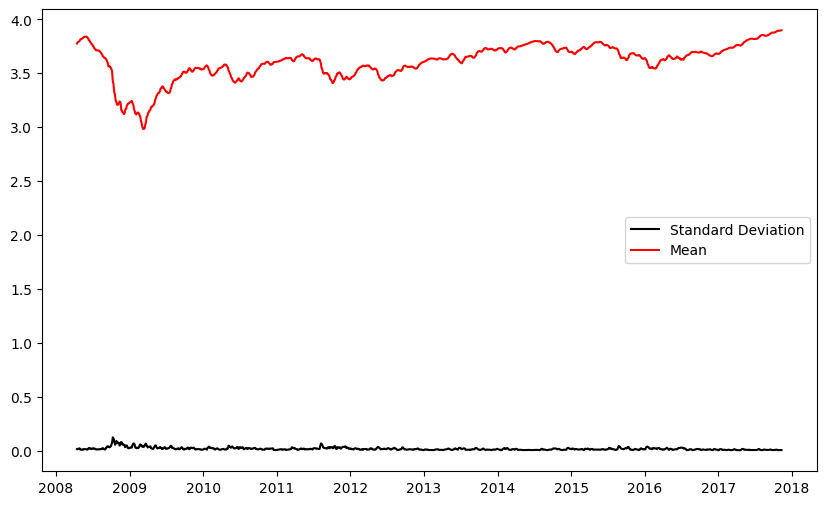

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

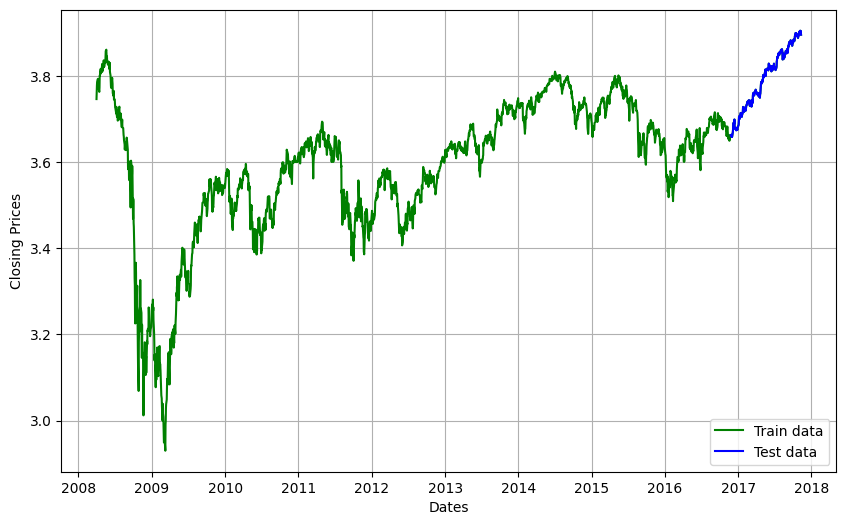

In [12]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11807.408, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11814.342, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11815.130, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11809.379, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11816.312, Time=0.89 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-11814.512, Time=1.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-11814.543, Time=1.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-11816.548, Time=1.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-11814.550, Time=1.49 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-11812.479, Time=3.54 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-11818.511, Time=0.90 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-11817.097, Time=0.59 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-11816.507, Time=1.05 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-11816.462, Time=0.61 sec
 ARIM

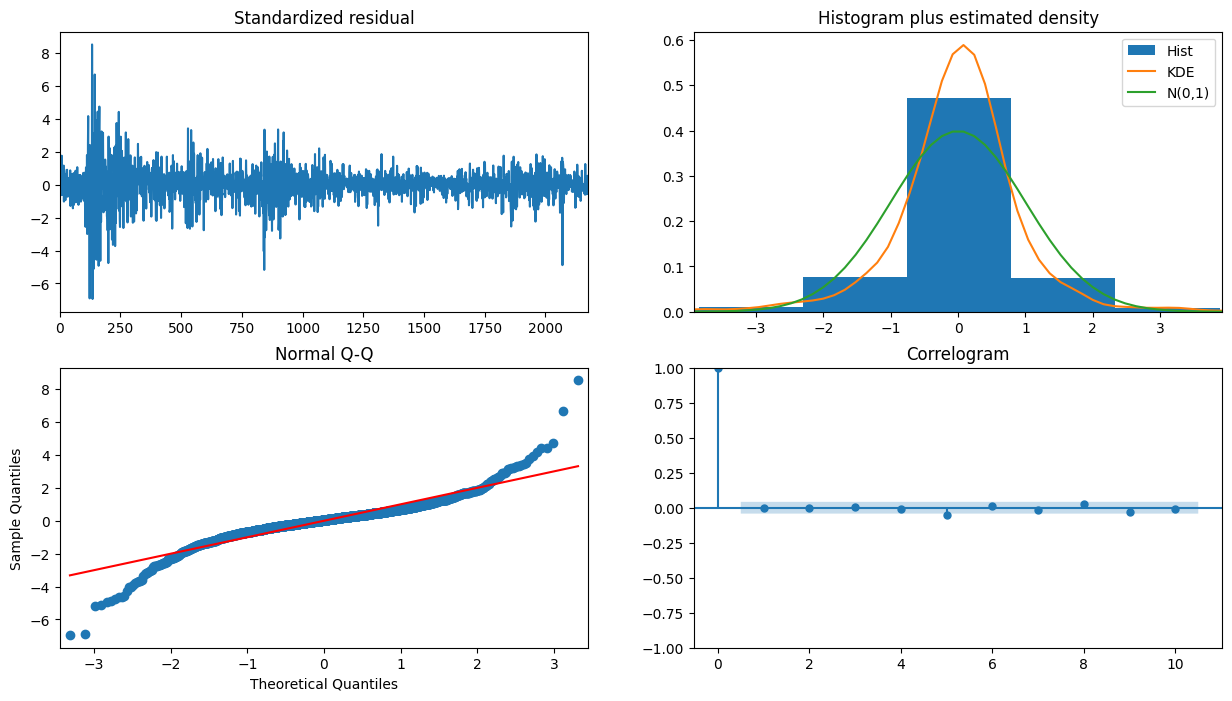

In [13]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [51]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data, order=(0,1,2))
fitted = model.fit(disp=False)
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2178
Model:               SARIMAX(0, 1, 2)   Log Likelihood                5912.256
Date:                Sat, 11 Nov 2023   AIC                         -11818.511
Time:                        12:22:29   BIC                         -11801.454
Sample:                             0   HQIC                        -11812.275
                               - 2178                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0672      0.012     -5.606      0.000      -0.091      -0.044
ma.L2         -0.0394      0.010     -3.935      0.000      -0.059      -0.020
sigma2         0.0003   3.63e-06     70.514      0.0

In [54]:
fc = fitted.get_forecast(steps=len(test_data), alpha=0.05)
fc_series= pd.Series(fc.predicted_mean)
fc_series.index = test_data.index
fc_series

Date
2016-11-25    3.658465
2016-11-28    3.658617
2016-11-29    3.658617
2016-11-30    3.658617
2016-12-01    3.658617
                ...   
2017-11-06    3.658617
2017-11-07    3.658617
2017-11-08    3.658617
2017-11-09    3.658617
2017-11-10    3.658617
Name: predicted_mean, Length: 243, dtype: float64

Date
2016-11-25    3.658465
2016-11-28    3.658617
2016-11-29    3.658617
2016-11-30    3.658617
2016-12-01    3.658617
                ...   
2017-11-06    3.658617
2017-11-07    3.658617
2017-11-08    3.658617
2017-11-09    3.658617
2017-11-10    3.658617
Name: predicted_mean, Length: 243, dtype: float64
Date
2016-11-25    3.662176
2016-11-28    3.658910
2016-11-29    3.663151
2016-11-30    3.662689
2016-12-01    3.658137
                ...   
2017-11-06    3.904696
2017-11-07    3.900760
2017-11-08    3.904192
2017-11-09    3.898532
2017-11-10    3.895487
Name: Close, Length: 243, dtype: float64


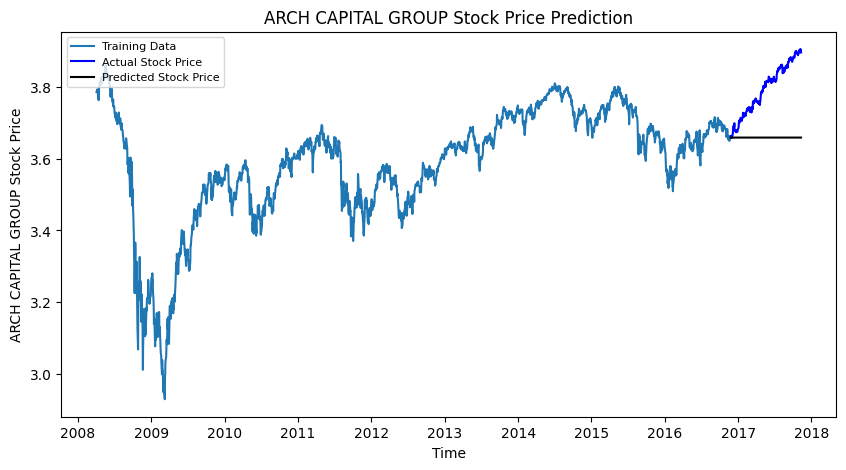

In [55]:

conf_int = fc.conf_int()
print(fc_series)
print(test_data)
# Plot
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, color='blue', label='Actual Stock Price')
plt.plot(fc_series, color='black', label='Predicted Stock Price')
# plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=.10)
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [56]:
# report performance
mse = mean_squared_error(test_data, fc_series)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc_series)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc_series))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc_series - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.023469666797984793
MAE: 0.13612790592854745
RMSE: 0.15319812922482048
MAPE: 0.03554060178007357
